In [27]:
%run "..\Startup_py3.py"
sys.path.append(r"..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import re

49100


In [28]:
data_folder = r'I:\MERFISH_Data\20220303-P_brain_M1_nonclear_adaptors'
dax_files =[os.path.join(data_folder, _fl) for _fl in os.listdir(data_folder) 
                if _fl.split(os.extsep)[-1] == 'dax' ]

sel_dax_files = []
for _fl in dax_files:
    _fov_id, _hyb = re.findall(r".*_([0-9]+)_([0-9]+).dax", _fl)[0]
    if _fov_id == '1':
        sel_dax_files.append(_fl)
        

In [29]:
sel_dax_files

['I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_1.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_10.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_2.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_3.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_4.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_5.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_6.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_7.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_8.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-488-s13_1_9.dax',
 'I:\\MERFISH_Data\\20220303-P_brain_M1_nonclear_adaptors\\Epi-750-647-561-488-405-s50_1_0.dax']

In [30]:
tar_im = ia.visual_tools.DaxReader(sel_dax_files[0]).loadAll()
ref_im = ia.visual_tools.DaxReader(sel_dax_files[-1]).loadAll()

In [9]:
bit3_im = tar_im[0::3]

<IPython.core.display.Javascript object>


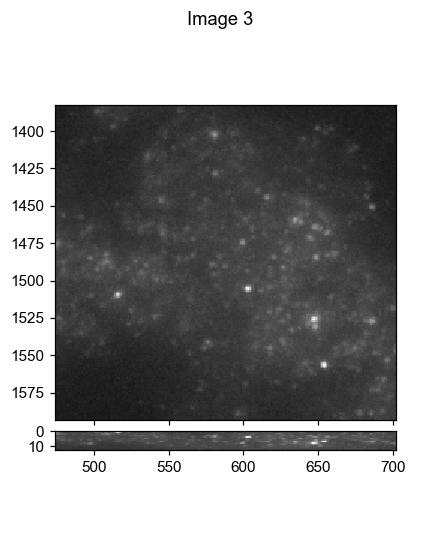

In [26]:
ia.visual_tools.imshow_mark_3d_v2([bit1_im, im_0225_bit3,im_0208_bit3])

In [12]:
im_0225 = ia.visual_tools.DaxReader(r"\\10.245.74.158\Chromatin_NAS_0\20220225-P_brain_M1_nonclear\H1M2\Conv_zscan_001.dax").loadAll()
im_0225_bit3 = im_0225[np.array([0,2,4,6,8,10,12,14,18,20,22,24,26])]

In [24]:
im_0208 = ia.visual_tools.DaxReader(r"\\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear\H1M2\Conv_zscan_001.dax").loadAll()
im_0208_bit3 = im_0208[0::3]

<IPython.core.display.Javascript object>


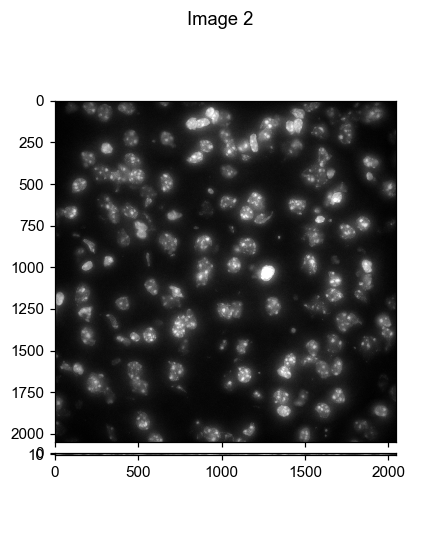

In [35]:
ia.visual_tools.imshow_mark_3d_v2([ref_im[np.arange(2,250,20)], ref_im[np.arange(4,250,20)]])

In [29]:
from skimage.registration import phase_cross_correlation

In [30]:
phase_cross_correlation(tar_bead_im[8], ref_bead_im[32])

(array([0., 8.]), 0.3634519381542375, -2.0776487580815742e-18)

<IPython.core.display.Javascript object>


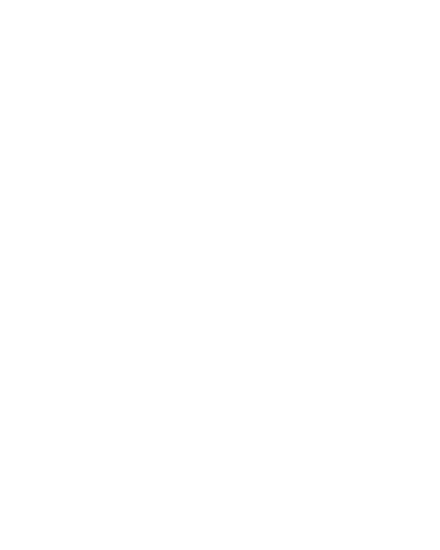

ValueError: zero-size array to reduction operation maximum which has no identity

In [42]:
# check decoding
import h5py
feature_file = r'I:\MERFISH_Analysis\Cellpose\20220303-P_brain_M1_nonclear_adaptors\CellPoseSegment\features\feature_data_0.hdf5'
with h5py.File(feature_file, 'r') as _f:
    print(_f['labeldata'].keys())
    _labels = _f['labeldata']['label3D'][:]

<KeysViewHDF5 ['label3D']>


<IPython.core.display.Javascript object>


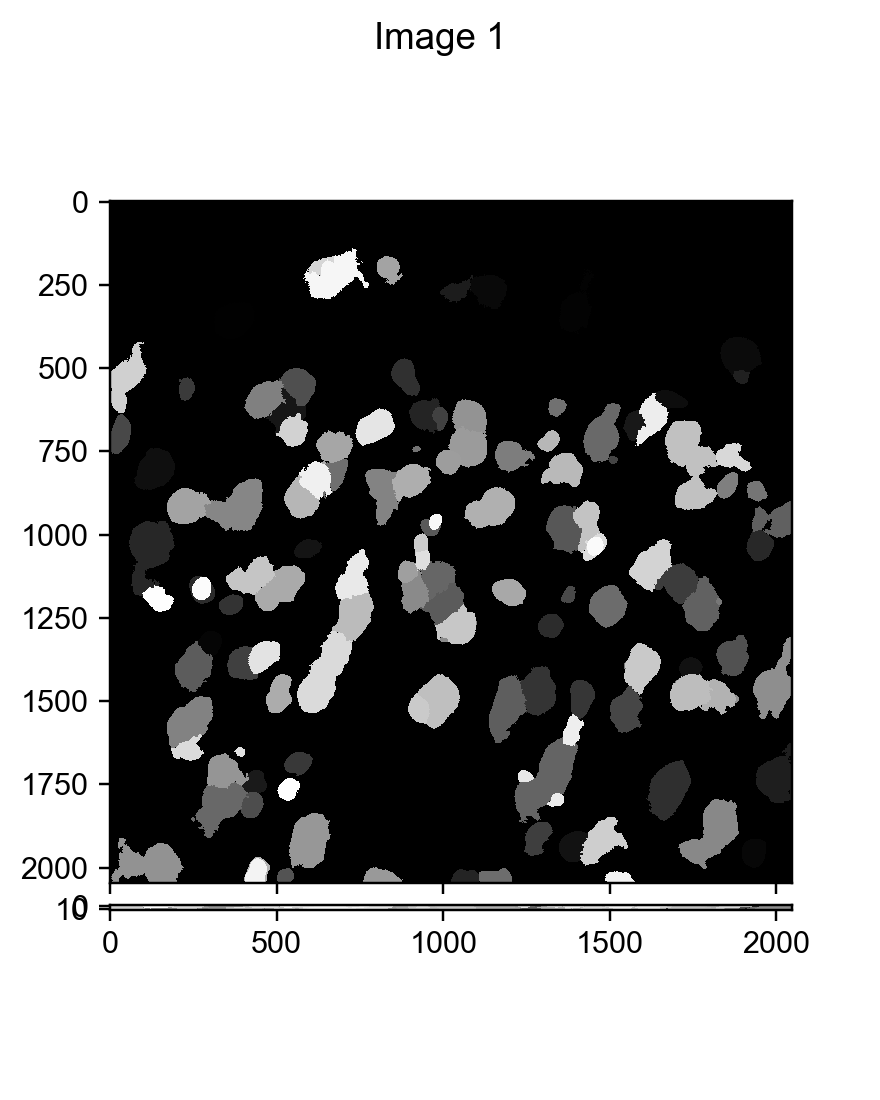

In [43]:
ia.visual_tools.imshow_mark_3d_v2([_labels])